# Z-Score Outliers Detection
In this notebook we will aplly two different version of the Z-Score to detect outliers in a datataset.
The first is the normal version of the Z-Score that use the mean and the standard deviation, while the second one is a modified version that is more robust and use the median and the median absolute deviation.

We will use the famous height data from Sir Francis Galton.


In [54]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
def outliers_z_score(ys, threshold):
    '''
    Args:
    -----
            ys(ndarray): data from which we want to estimate mean and std
    Return: 
    -------
            outliers(ndarray): data above the threshold
    '''
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    outliers = np.where(np.abs(z_scores) > threshold)
    return outliers

def outliers_modified_z_score(ys, threshold):
    '''
    Modified version of the z-score
    Args:
    -----
            ys(ndarray): data from which we want to estimate mean and std
    Return: 
    -------
            outliers(ndarray): data above the threshold
    '''
    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]
    outliers = np.where(np.abs(modified_z_scores) > threshold)
    return outliers

## Data

The dataset used is Sir Francis Galton’s famous height dataset, made available by Random at the University of Alabama in Huntsville. The dataset records the heights(inches) of 898 people.

In particular:

- Family: The family that the child belongs to, labeled from 1 to 204 and 136A
- Father: The father's height, in inches
- Mother: The mother's height, in inches
- Gender: The gender of the child, male (M) or female (F)
- Height: The height of the child, in inches
- Kids: The number of kids in the family of the child

In [6]:
df = pd.read_csv('../data/galton_heights.txt', sep = '\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
Family    898 non-null object
Father    898 non-null float64
Mother    898 non-null float64
Gender    898 non-null object
Height    898 non-null float64
Kids      898 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [10]:
df.describe()

,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


## Exploratory Data Analysis

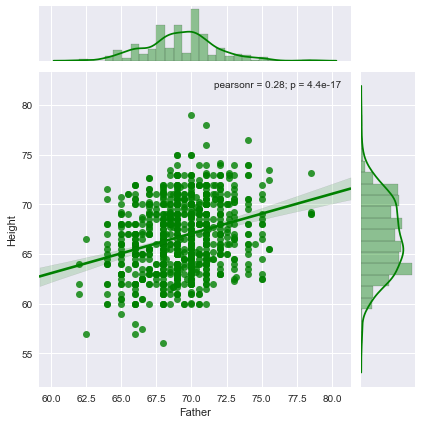

In [33]:
plt.rcParams["patch.force_edgecolor"] = True
sns.jointplot(x='Father',y='Height',data=df, kind='reg', color='green')

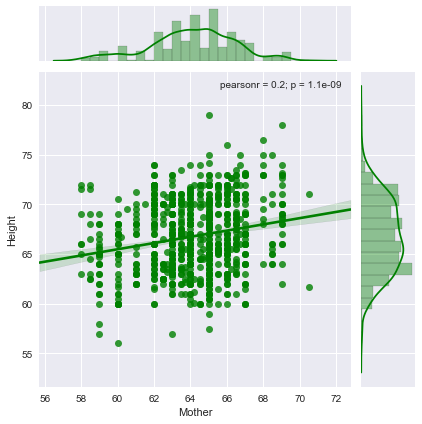

In [53]:
sns.jointplot(x='Mother',y='Height',data=df, kind='reg', color='green')

## Z-Score

The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a gaussian distribution. This makes z-score a parametric method. Very frequently data points are not to described by a gaussian distribution, this problem can be solved by applying transformations to data (ie:scaling it)

The z-score of any data point can be calculated with the following expression: $\frac{(x - \mu)}{\sigma}$

When computing the z-score for each sample on the data set a threshold must be specified. Some good ‘thumb-rule’ thresholds can be: 2.5, 3, 3.5 or more standard deviations.

![title](https://www.mathplanet.com/Oldsite/media/27934/normal_distribution_500x263.jpg)

By ‘tagging’ or removing the data points that lay beyond a given threshold we are classifying data into outliers and not outliers

In [95]:
# Set the threshold(suggested: 2.5, 3, 3.5)
threshold = 2.5
outliers = outliers_z_score(df['Height'], threshold)
df['outliers'] = np.zeros(len(df))
df.loc[outliers[0],'outliers'] = 1

## Results

In [113]:
# Outliers with Z-Score
df[df['outliers'] == 1]

,Family,Father,Mother,Gender,Height,Kids,outliers
22,7,74.0,68.0,M,76.5,6,1.0
125,35,71.0,69.0,M,78.0,5,1.0
146,40,71.0,66.0,M,76.0,5,1.0
288,72,70.0,65.0,M,79.0,7,1.0
672,155,68.0,60.0,F,56.0,7,1.0
779,176,66.5,65.0,F,57.5,8,1.0
821,185,66.0,59.0,F,57.0,15,1.0
889,204,62.5,63.0,F,57.0,2,1.0


## Modified Z-Score
The main problem of the Z-scor method is tha  the mean and standard deviation are highly affected by outliers, so they are not robust.
Another problem of the Z-score method is that it behaves strangely in small datasets, in fact, the Z-score method will never detect an outlier if the dataset has fewer than 12 items in it.

In the modified Z-Score we will overcome these limitations, using the median and median absolute deviation, that are robust measures of central tendency and dispersion respectively.

In [121]:
threshold = 2.5
outliers_new = outliers_modified_z_score(df['Height'], threshold)
df['outliers'] = np.zeros(len(df))
df.loc[outliers_new[0],'outliers'] = 1

## Results

In [122]:
# Outliers with Z-Score
df[df['outliers'] == 1]

,Family,Father,Mother,Gender,Height,Kids,outliers
22,7,74.0,68.0,M,76.5,6,1.0
125,35,71.0,69.0,M,78.0,5,1.0
146,40,71.0,66.0,M,76.0,5,1.0
288,72,70.0,65.0,M,79.0,7,1.0
672,155,68.0,60.0,F,56.0,7,1.0
821,185,66.0,59.0,F,57.0,15,1.0
889,204,62.5,63.0,F,57.0,2,1.0


From the comparison of the two results we can notice that they detect the same outliers, with just one exception, since the modified Z-Score don't detect the data n. 779 as an outlier